# Diffusion Curvature for Fast, Point-wise, Noise-Resistant Geometric

Featurization of Graphs and Pointclouds

Kincaid MacDonald [](https://orcid.org/0009-0006-4686-7488) (Yale)  
Dhananjay Bhaskar [](https://orcid.org/0000-0002-7859-8394) (MILA)  
Yanlei Zhang [](https://orcid.org/0000-0002-7859-8394) (MILA)  
Ian Adelstein [](https://orcid.org/0000-0002-7859-8394) (Yale Department of Math)  
Smita Krishnaswamy [](https://orcid.org/0000-0002-7859-8394) (Yale Department of Applied Math, Yale School of Medicine)  
July 30, 2024

For a number of years now work has been proceeding in order to bring to perfection the crudely conceived idea of a machine that would not only supply inverse reactive current for use in unilateral phase detractors, but would also be capable of automatically synchronizing cardinal grammeters. Such a machine is the “Turbo-Encabulator.”

# 1. Introduction

In this age of overwhelmingly abundant data, those racing to make sense of it all have developed an appreciation for theories and metaphors from the once hopelessly abstract mathematical fields of topology and Riemannian geometry. Endowing noisy, sparse, high-dimensional real-world data with geometric and topological features is helpful in two ways: it empirically improves the performance of black-box machine learning models; and, in cases like cellular differentiation, it also helps *us* interpret the data. What’s more, by anchoring these models and their inputs to well-established theories, it can bring analytical light to a theoretically-impoverished field.

As a case in point, consider the emerging subfield of *Topological Data Analysis* (TDA). While graph neural networks struggle with problems of over-smoothing and over-squashing, TDA endows graph or pointcloud data with global topological features with provable guarantees. (LIST SUCCESSES OF TDA.) Behind this success is *persistence homology*, a sort of ‘Rosetta Stone’ between the mathematical theories of analytically-specified manifolds, and the messy realities of actual data. Persistence homology gives a framework for extracting the most salient topological features from amidst the noise and sparsity of real-world point clouds. (MORE SUCCESSES)

We await the geometric equivalent of this topological Renaissance. While TDA can describe the shape of the data in its entirety, there’s a need for more local descriptions of data geometry. Forget the data as a whole; what’s happening around *this point*, in *this neighborhood*? Topological analysis only assumes hierarchies of sets. But for many types of point cloud data, e.g. those arising from time-varying systems like cellular development or neuronal activity, notions of angle, distance, and volume have meaning. In other words, in our field’s famous ‘Manifold Hypothesis’ we’re often assuming a *Riemannian* manifold: samples from some continuous underlying object that can be analyzed at infinitesimal scales.

However, translating the language of Riemannian geometry to the discrete, sampled realm is troublesome. Nowhere is this more evident than curvature. It’s among the most basic of geometric properties, underlying volumes, distances, and geodesics. Where TDA captures global structure, curvature epitomizes the description of local structure. Classical definitions, however, are hard to reconcile with reality; many involve some infinitesimal shrinking, e.g. by fitting osculating circles of radius limiting to zero, or comparing volumes of balls converging to a point. Other definitions involve even more complex objects, like tangent bundles or local parameterizations of the manifold. In the discrete, sampled realm, taking such a local limit is impossible – one can’t ‘zoom in’ past the known samples. Moreover, in contrast to Riemannian manifolds, noisy samplings are *least* trustworthy at the local level – which is precisely where we wish to measure geometric information.

There have been several attempts to bridge curvature to the discrete realm. (BRIEF DESCRIPTIONS OF PREVIOUS WORK) Ollivier-Ricci Curvature and Forman Ricci curvature use optimal transport to define an edge-wise Ricci curvature at any given scale. Hickok & Blumberg define a point cloud curvature by estimating graph volumes over time, and fitting a quadratic to recover a scalar curvature. Sritharan et al. and, recently, Zhang et al. (CITATIONS PLEASE) approximate tangent planes with localized PCA, and track the movement of these planes to recover sectional curvatures. These curvatures have been found to exceed the WL-expressivity of graph neural networks, and when used to augment GNNs, improve their performance (CITE BASTION). They have also been used to study cellular differentiation, image data, etc…

With so many existing curvature methods, why introduce another one? Indeed, we came to this area interested only in using curvature to aid our study of complex high-dimensional systems like neural networks’ loss landscapes. However, our experimentation with existing methods suggested that, while existing methods have many elegant ideas, their techniques are in practice unreliable. The optimal-transport curvatures, like Ollivier Ricci, were designed for networks, and have poor resilience to the noise ubiquitous in point-cloud data. Many techniques rely on shortest-path distances, which are themselves easily corrupted by noise. And all techniques have parameters which must be carefully tuned, and – as our experiments found – give not just noisy, but *backwards* results if mistuned. And how *can* one tune these parameters, when the ground truth curvature of interest is unknown? The success of TDA is partially attributable to how easily a domain practitioner can apply it to their problem of interest; persistence homology has few parameters and tunes itself. The field of graph curvature has no such Rosetta Stone for adapting geometric theory to the messy world of practice.

What might such a Rosetta Stone be? One candidate, with a long track-record of producing robust geometric features from high-dimensional, noisy data is *diffusion geometry*. The basic object in this framework is the random walk, or diffusion operator. When iterated, this operator endows each point with a probability distribution which is extremely robust to noise and spurious connections. In this way, a point cloud can be lifted into a *statistical manifold*: the original, unreliable sampling coordinates supplanted with diffusion probabilities. By manipulating these diffusion probabilities in various ways, one can define several varieties of ‘diffusion distances’. These distances can give rise to low-dimensional embedding and visualization techniques, like PHATE and HeatGeo. One can even bring in the Riemannian tool of pullback metrics to endow the point cloud with a Riemannian metric. Unsurprisingly, diffusion probabilities also contain information about curvature. In (CITE ORIGINAL PAPER), we presented a preliminary technique for extracting curvature from the ‘laziness’ of the diffusion operator. This fledgling method proved extremely robust to noise, though still somewhat sensitive to its parameters, and being an unsigned correlate, was unable to differentiate positive from negative curvature.

Here, we describe a significantly refined version of these ideas, which we christen *Diffusion Curvature*. It inherits the noise resilience of diffusion geometry, and, in a style reminiscent of persistence homology, further improves this resilience by incorporating many scales of diffusion into one measure. The result is far easier for the domain practitioner to use, having only one parameter, to which it is extremely robust. Moreover, we prove connections between diffusion curvature and the field’s bulwark, Ollivier-Ricci curvature, positioning diffusion curvature as a point-wise adaptation of Ollivier-Ricci curvature especially suitable for pointcloud data. We also describe a new technique for comparing diffusions across differently-sampled graphs and point clouds, with which diffusion curvature can distinguish between negative, flat, and positively curved spaces. Indeed, in our experiments, diffusion curvature appears both the most resilient to noise and the most capable of distinguishing negative from positive curvatures in high dimensions. This motivates the hypothesis that diffusion geometry is a uniquely capable ‘Rosetta Stone’ for translating Riemannian geometry into the sampled realm.

In sum, our contributions are: 1. *Diffusion Curvature*, a fast, noise-resistant and signed scalar curvature for point cloud data which is also natively differentiable. 2. Theoretical connections between the diffusion geometry underlying diffusion curvature and Ollivier-Ricci curvature, which enables adaptation of Ollivier’s results in metric measure theory to other realms of diffusion geometry. 3. *Diffusion Trajectory Normalization*, a technique for comparing diffusions across manifolds.

# 2. Background

## 2.1 Curvature in the Continuous Setting

There are many definitions of curvature on Riemannian manifolds. In this work, we focus on discrete analogs to the *Ricci* curvature $\text{Ric}(x,y)$, which we’ll briefly motivate in the continuous setting.

Imagine two spheres of equal radius centered at $x$ and $y$ in a Riemannian manifold $\mathcal{M}$. Intuitively, the Ricci curvature between $x$ and $y$ measures the difference between the distance of these midpoints, and the average distance between corresponding points in each sphere. In an area of positive Ricci curvature, points in spheres are, on average, closer than their midpoints; in negative Ricci curvature, the points in the sphere are further, on average, than the midpoints. This is formally described by first defining the *sectional curvature* as the contraction of length incurred by parallel transport through a 2-plane of the manifold, then defining the Ricci curvature as an average of the sectional curvatures between two points. For the present work, we needn’t reproduce the full definitions, but we will recall some properties of manifolds with Ricci curvature bounded from below by some $k$.

First, recall the relation between curvature and volume. In spaces of high positive curvature, the volume of a ball is than a ball of the same radius in a flat space, and even smaller than a ball of the same radius in a hyperbolic space. This is formally expressed by the Bishop Gromov inequality ([“Bishop–Gromov Inequality” 2021](#ref-2021BishopGromovInequality)).

<span class="theorem-title">**Theorem 1 (Bishop-Gromov)**</span> Let $\mathcal{M}$ be a complete $d$-dimensional Riemannian manifold with $Ric(x,y) > (d - 1)k$ for all $x,y \in \mathcal{M}$ and $k \in \mathbb{R}$. Let $M_{K}^d$ be the complete $d$-dimensional simply connected space of constant sectional curvature $k$. Denote by $B(x,k)$ the ball of radius $k$ centered at $x$. Then for any $x \in \mathcal{M}$ and $x_{k} \in M_{K}^d$, the function

$$
\phi(r) = \frac{\operatorname{Vol}B(x,r)}{\operatorname{Vol}B(x_{k},r)}
$$ is non-increasing on $(0,\infty)$.

This phenomenon of diminishing volume in positive curvature is related to the convergence of geodesic rays. In the plane (or saddle), two geodesic rays extending from the same point in different directions will never intersect. But on the sphere, they *will* meet again – at the opposite pole. This convergence constrains the maximum diameter a space of positive curvature may have, as expressed in the Bonnet-Myers Theorem ([Ollivier 2009](#ref-ollivier2009RicciCurvatureMarkov)):

<span class="theorem-title">**Theorem 2 (Bonnet-Myers)**</span> Let $X$ be an $d$-dimensional Riemannian manifold. Let $\inf \operatorname{Ric}(X)$ be the infimum of the Ricci curvature $\operatorname{Ric}(v, v)$ over all unit tangent vectors $v$. Let $S^d \subset \mathbb{R}^{d+1}$ be the unit sphere of the same dimension as $X$. Then, if $\inf \operatorname{Ric}(X) \geqslant \inf \operatorname{Ric}\left(S^d\right)$ then $\operatorname{diam} X \leqslant \operatorname{diam} S^d$.

We’ll encounter versions of Bishop-Gromov and Bonnet-Myers in our discrete setting. But first, let’s describe the construction and properties of our specific discrete setting.

## 2.2 The Discrete Setting

Within the ambient setting of points $x_{i} \in \mathbb{R}^D$, the Euclidean distances between the points in our point cloud are not very useful. To perform geometric analysis, we want the manifold’s *geodesic* distances between $x_{i}, x_{j} \in \mathcal{M}$,. However, manifolds are locally euclidean, so within a sufficiently small neighborhood of $x_{i} \in \mathcal{M}$ , the euclidean distances are accurate. This is the basis of graph construction: retain only the trustworthy local distances, discard the rest, and then “integrate” over the local neighborhoods to recover features of the global geometry.

A graph $G = (V, E)$ is a collection of $n$ vertices $v_{i} \in V$ connected by (possibly weighted) edges $e_{ij} \in E$ . It is efficiently represented by a single *adjacency* (or *affinity*) matrix $A \in \mathbb{R}^{n \times n}$, where $A_{ij}$ expresses the degree of connection between the vertices $v_{i}$ and $v_{j}$. In a binary adjacency matrix, $A_{ij}=1$ iff there is an edge between $v_{i}$ and $v_{j}$. In a weighted affinity matrix, $0<A_{ij}<1$ with a higher affinity indicating a closer connection between the nodes.

One can construct an affinity matrix from a point cloud with the following algorithm: 1. Compute the matrix $D$ of pairwise euclidean distances between points, so that $D_{ij}=\|x_{i}-x_{j}\|_{2}$. 2. Apply a kernel $\kappa$ to the distances to construct the affinity matrix, where $A_{ij} = \kappa(D_{ij})$. This is typically the gaussian kernel: $$
\kappa(y) = \frac{1}{\sqrt{ 2\pi }\sigma}\exp\left( -\frac{y}{\sigma^2} \right)
$$ There are a variety of heuristics for selecting an appropriate kernel bandwidth $\sigma$. In this paper, we use an adaptive kernel bandwidth, in which, when computing $k(D_{ij})$, $\sigma$ is set to the mean distance from the points $x_{i}$ and $x_{j}$ to their $k$-th nearest neighbor.

After building our graph affinity matrix $A$, we created a new representation of the point cloud $X$ – turning it from an $n \times D$ matrix of unwieldy ambient coordinates into an $n \times n$ matrix of pairwise connections between points. The challenge is now to reassemble this information of local connectivity to recover the features of $\mathcal{M}$. Graph diffusion does precisely this.

## 2.3 Graph Diffusion

By row-normalizing $A$, one obtains the graph diffusion matrix $P = D^{-1}A$, which is a commonly-used method of “integrating” the local connectivity of the graph $A$ into global geometric descriptors of $\mathcal{M}$. Coifman and Lafon ([Coifman and Lafon 2006](#ref-coifman2006DiffusionMaps)) proved a correspondence between iterated graph diffusion $P^t$ and the Neumann heat kernel on $\mathcal{M}$. Their technique, *Diffusion Maps*, uses the Euclidean distances between eigencoordinates of $P$ to approximate the geodesic distances on $\mathcal{M}$. The visualization technique $PHATE$ ([Moon et al. 2019](#ref-moon2019VisualizingStructureTransitions)) constructs a low-dimensional embedding of a point cloud $X$ such that a distance between the transition probabilities $P$ of $X$ is preserved in the embedding. (More on properties of phate, trajectory preservation.) *Diffusion Earth Mover’s Distance* ([A. Y. Tong et al. 2021](#ref-tong2021DiffusionEarthMovera)) efficiently approximates the transportation distance between distributions on a graph using multi-scale wavelet transform obtained by applying different scales of diffusion. *LEGSNet*‘s “learnable geometric scattering” computes tunable scales of diffusion with a graph neural network and achieves state of the art performance on biochemistry graph classification ([A. Tong et al. 2021](#ref-tong2021DatadrivenLearningGeometric)). These are but a few of the many manifold learning techniques based in diffusion.

Constructing the diffusion matrix from the affinity matrix $A$ is straightforward: you simply row-normalize $A$, with an optional step to normalizing by density.

Here is the algorithm presented in Coifman and Lafon ([Coifman and Lafon 2006](#ref-coifman2006DiffusionMaps)):

1.  (Optional) Compute an *anisotropic density normalization* on $A$, obtaining the anisotropic adjacency matrix $A_{\star}$.
2.  Construct the degree matrix $D$, whose diagonal entries are the rowsums of $A$, i.e. $D_{ii} = \sum_{j}A_{ij}$.. The other entries are zeros.
3.  Define $P = D^{-1} A$, the graph diffusion matrix.

-   [ ] Clean this up: get anisotropic equation, and clarify the role of the self affinity. When is it removed? When is laziness added?

$P$ has several nice properties. The rows $P[i]$ give the transition probabilities of a single step random walk starting at point $x_{i}$; each row $P[i]$ can be viewed as a probability distribution centered at $x_{i}$. This is preserved under powers of the matrix. The rows of $P^t$ still sum to 1, and $P^t[i]$ now gives the probability distribution of a $t$-step random walk starting at $x_{i}$.

Although $P$ is not symmetric, it is conjugate to a symmetric matrix, via $D^{0.5}PD^{-0.5} = D^{-0.5}AD^{-0.5}$, granting it a full basis of real-valued eigenvectors and eigenvalues. These eigenvectors are shared with the normalized graph Laplacian $L = I - D^{-0.5}AD^{-0.5}$. The eigenvalues of $P$ have magnitude less than or equal to 1. Powering the matrix $P^t$ thus corresponds to powering the eigenvalues $\lambda_{i}^t$ of $P$, via diagonalization $$
P^t = \Psi \Lambda^t \Psi^T
$$ This is similar to applying a low-pass filter to the graph. As $t$ increases, the smallest eigenvalues decay fastest under repeated powering, and their corresponding eigenvector vanishes from the eigenbasis – leaving only the largest $\lambda_{i}$, whose eigenvectors trace global geometric features.

This is a remarkable feature of the diffusion matrix: the ability to “denoise” itself by iterating the random walk over larger time scales. Intuitively, the paths through the data most robustly trafficked by random walkers are those supported by multiple high-probability connections from independent starting points.

## 2.4 Ollivier-Ricci Curvature

Developed by Yann Ollivier in 2007, *Coarse Ricci Curvature* (or sometimes, “Ollivier Ricci Curvature”) is a direct translation of Ricci curvature to discrete metric spaces like graphs ([Ollivier 2009](#ref-ollivier2009RicciCurvatureMarkov)). Several classical properties of Ricci curvature can be extended to the graph setting using Coarse Ricci Curvature. Ollivier has, for instance, proven versions of concentration inequalities, Bonnet Myers (more). Coarse Ricci Curvature has, in this way, become something of a bridge between continuous and coarse geometry. The basis of this bridge is optimal transport, and specifically, the 1-Wasserstein distance.

In the Riemannian setting, Ricci curvature captures the phenomenon that, in positive curvature, “small spheres are closer (in transportation distance) than their centers are” ([Ollivier 2009](#ref-ollivier2009RicciCurvatureMarkov)). On the sphere, for instance, imagine two circles centered on the north and south poles: every point in each circle is closer to the corresponding point in the opposite circle than are the circles’ centers. This effect diminishes as one moves the circles closer together, but never reaches equality. In negatively curved spaces, the discrepancy reverses, while in a flat space, the average distance between the points of the circles is the distance between the centers.

Coarse Ricci Curvature captures a similar phenomenon on graphs. Instead of spheres, it uses locally-centered probability distributions defined by random walks. And to measure the distance between these walks, it uses the 1-Wasserstein (or Earth Mover’s) distance. We’ll briefly define each.

The 1-Wasserstein distance is a measure of the distance between probability distributions. Given distributions $\mu_{x}$ and $\mu_{y}$ over some shared space $X$, the Wasserstein distance quantifies the smallest amount of “work” needed to transform one distribution into another, by transporting probability “mass” between pairs of points over the ground metric $d(x,y)$:

<span class="theorem-title">**Definition 1 (1-Wasserstein Distance)**</span> The 1-Wasserstein distance between distributions $\mu_{x}$ and $\mu_{y}$ is $$ W_{1}(\mu_{x},\mu_{y}) := \inf_{\xi \in \Pi(\mu_{x},\mu_{u})} \int \int d(x,y) \, d\xi(x,y) $$ where the “transportation plan” $\xi$ is drawn from the space $\Pi(\mu_{x},\mu_{y})$ of joint probability distributions over $X \times X$ which project onto $\mu_{x}$ and $\mu_{y}$. In the discrete setting, this translates naturally into an infimum over a summation. $$W_{1}(\mu_{x},\mu_{y}) := \inf_{\xi \in \Pi(\mu_{x},\mu_{y})} \sum_{x \in X} \sum_{y \in X} d(x,y) \xi(x,y)$$

What is the analog on a graph of a “small sphere” around a point? Ollivier replaces spheres with a family of measures $m_{x}(\cdot)$ defined for each point $x$, where

1.  Each $\mu_{x}(\cdot)$ depends measurably on $x$, i.e. the map $x \to \mu_{x}$ is measurable.
2.  Each $\mu_{x}(\cdot)$ has finite first moment, or *Jump*, i.e. for some $o \in X$ $\int d(o,y) \mu_{x}(y) \, dx < \infty$.

In graphs, Ollivier defines these $\mu_x$ as the probability distributions created by a single-step random walk from the point $x$.

With a transition probability $\alpha$, and equal probability of moving to each of $x$’s neighbors on the graph, $\mu_{x}(x) = (1-\alpha)$ and $m_{x}(y) = \alpha$ if $y \in N(x)$ or $0$ otherwise.

This is analogous to defining $m_{x} = P e_{x}$, if $P$ is the diffusion matrix created from a binary adjacency matrix. Note, however, that there is nothing limiting us to binary adjacency matrices, or even single steps of diffusion; the two conditions above are equally satisfied by weighted adjacency matrices and $t$-step diffusions, and in sparse or noisy graphs, this may be desirable.

<span class="theorem-title">**Definition 2 (Coarse Ricci Curvature)**</span> The *Coarse Ricci Curvature* between $x$ and $y$ is $$\kappa(x, y):=1-\frac{W_1\left(m_x, m_y\right)}{d(x, y)}$$

There are a number of provisos attached to this definition, which tries to approximate a continuous phenomenon within discrete constraints. These constraints, and the relationship between Ricci and Ollivier’s coarse Ricci curvature are illustrated Ollivier’s Example 2.6 ([Ollivier 2009](#ref-ollivier2009RicciCurvatureMarkov)):

<span class="theorem-title">**Example 1**</span> Let $(X,d)$ be a smooth Riemannian manifold of dimension $d$ and let $\text{vol}$ be the Riemannian volume measure. Let $\epsilon>0$ small enough and consider the ball of radius $\epsilon$ around each point $x$. Let $x,y \in X$ be two sufficiently close points. Let $v$ be the unit tangent vector at $x$ directed towards $y$. The coarse Ricci curvature along $v$ is then $$\kappa(x,y) = \frac{\epsilon^2 \text{Ric}(v,v)}{2(d+2)}+o(\epsilon^3 + \epsilon^2d(x,y))$$

Hence the coarse Ricci curvature applied to a manifold recovers the Ricci curvature, up to a scaling factor contingent on dimension, and plus an error term that grows with the radius of ball and distance between points.

Ollivier’s choice not to scale $\kappa(x,y)$ by dimension is interesting, and likely motivated by his application of coarse Ricci curvature to graph-like spaces for which dimension isn’t clearly defined, like social networks. Within our domain of point-cloud data, incorporating dimension may be desirable; without it, spaces of high dimension can be conflated with spaces of lower dimension but higher negative curvature.

-   [ ] Ollivier actually does define a local diffusion-based dimension

A result on coarse Ricci curvature which will prove useful concerns the *contraction (or expansion) of measure* that occurs under diffusion in spaces of positive (or negative) curvature. This is Ollivier ([2009](#ref-ollivier2009RicciCurvatureMarkov))’s Proposition 20:

<span class="theorem-title">**Proposition 1 ($W_1$ Contraction of Measure)**</span> Let $(X,d,m)$ be a metric space with a random walk. Let $\kappa \in \mathbb{R}$. Then we have $\kappa(x,y) \geq \kappa$ for all $x,y \in X$ iff for any two probability distributions $\mu, \mu' \in \mathcal{P}(X)$ one has

$$
W_{1}(\mu \star m, \mu' \star m) \leq (1-k)W_{1}(\mu, \mu')
$$ Where $$
 \mu \star m := \int_{{x \in X}} d\mu(x)m_{x} \, dx
$$

# 3. Methods

We consider a measure space $(X,p)$ equipped with a random walk, e.g. a point cloud and a diffusion operator derived as above. In this section, we define a new notion of curvature deriving from this random walk.

The core intuition of Diffusion Curvature is that the *laziness* of random walks on a graph is a proxy for the curvature of the underlying manifold. Picture a “random walker” drunkenly traversing a sphere. If he manages, over the course of several steps, to wander to the opposite pole, he has many ways of getting back to where he started. By contrast, if he begins on the top of a (negatively-curved) saddle and wanders down one side, any path aside from exactly retracing his steps incurs a steep penalty in extra distance. On the sphere, the random walker is more likely to find his way home: his walks are “lazier”.

Our previous paper ([Bhaskar et al. 2022](#ref-bhaskar2022DiffusionCurvatureEstimating)) measured this laziness directly, as the return probability within a k-neighborhood of the starting point. This required tuning the parameter $k$, and neglected the information provided by probabilities outside of this neighborhood.

We refine our previous definition of diffusion laziness by replacing the neighborhood-sum with a distributional distance measure $D$ between a dirac $\delta_{x}$ and its $t$-step diffusion $p_{x}^X(t)$. This provides a more sensitive and parameter-free measure of how ‘spread out’ the diffusion is.

<span class="theorem-title">**Definition 3 (Diffusion Energy Snapshot)**</span> Given some distributional distance $D$, the $D$-energy snapshot of a diffusion $p_{x}^X(t)$ is $$
l_{X}(x,t) := D\left(\delta_x, p_x^X(t)\right)
$$

By $p_{x}^X(t)$, we indicate the $t$-step diffusion of the dirac $\delta_{x}$ centered at $x \in X$, using the diffusion operator for the measure space $X$. We use the term ‘Diffusion Energy’ in reference to our previous work (CITE), which measured curvature via ‘Diffusion Laziness’. That laziness measurement increased with positive curvature; diffusion energy does the opposite, increasing with more negative curvature.

The distributional distance $D$ may be the Wasserstein-1 distance, as with Ollivier-Ricci curvature; it may be the Jensen-Shannon Distance, evoking the classical use of entropy to measure the diffusion of heat; or it may be some other domain-specific form chosen for a particular metric measure space.

This measure of diffusion energy provides a snapshot of curvature at single diffusion time. However, this curvature is unsigned, and sensitive to the choice of $t$. Moreover, as we’ll discuss, differences in graph construction cause the times associated with the diffusion operators from different spaces to change at different speeds. This makes it hard to compare the geometric information gleaned from the diffusion operator across manifolds.

Instead of these static and fickle snapshots of a diffusion process, we consider the process in its entirety. As $t$ ranges from 0 to $\infty$, the diffusions $p_{x}^X(t)$ can be viewed as a trajectory on the $n$-dimensional probability simplex, where $n$ is the number of points in $X$. Given a distributional distance and its generating Riemannian metric, we can define Diffusion Curvature as the path integral of diffusion energy along this trajectory.

<span class="theorem-title">**Definition 4 (Diffusion Energy)**</span> Given a metric $g_{p}$ on the statistical manifold of diffusion probabilities, and the distributional distance $D$ it generates the Diffusion Energy of a point $x \in X$ is

$$
l_{X}(x, d)= \int_{t=0}^{T(d)} D\left(\delta_x, p_x^X(t)\right) g_p\left(\frac{d p_x^X(t)}{d t}, \frac{ d p_x^X(t) }{d t} \right)
$$

where $T(d)$ is a function that converts between the calculated *Diffusion Trajectory Distances* $d$ and diffusion times $t$.

In practice, we don’t have an infinitesimal parameterization of $p_{x}^X$, so approximate this with the algorithm in BOX WAWA: we compute $T$ scales of diffusion (e.g. 50), sum the distributional distances between each scale to estimate the path integral, and then use a trapezoidal approximation of the integral of $L_{x}(t)$ with respect to the distances along the trajectory.

By viewing the energy integrated along a diffusion trajectory, we eliminate many of the differences between diffusions on different spaces. This enables the computation of a *signed* curvature, by taking the difference of diffusion energies from a given space and a comparison space of known Euclidean curvature and equal dimension to $X$. In practice, we construct the comparison space as uniform samples from $\mathbb{R}^d$, where $d$ is the intrinsic dimension of $X$.

<span class="theorem-title">**Definition 5 (Diffusion Curvature)**</span> Given points $X \subseteq \mathcal{M}$, where $\mathcal{M}$ is a Riemannian manifold of dimension $d$, the *Diffusion Curvature* of $x \in X$ is

$$
k_(x, d) = l_{X}(x, d) - l_{X}(x, d)
$$ where $E \subseteq \mathbb{R}^d$ is a collection of uniformly sampled points from $\mathbb{R}^d$.

The usefulness of this definition rests upon two claims:

1.  That diffusion energy is indeed a measure of (unsigned) curvature
2.  That our integration along diffusion trajectories enables this energy to be compared across point clouds with different diffusion processes.

The next two sections will analyze this first claim. We first analyze diffusion energy within Ollivier’s framework of metric measure theory, and bound the diffusion energy from above by the Ollivier-Ricci curvature. We then provide a motivating example recovering a Bishop-Gromov type volume comparison from the diffusion curvature with an entropic distance.

Finally, we support the second claim with illustrations of point clouds which diffusion trajectories can uniquely compare. We also describe how common techniques of constructing graphs from point clouds can obscure geometric information, and propose a ‘curvature-agnostic kernel’ to facilitate more geometrically-faithful graph construction.

## 3.1 Diffusion Energy is bounded by Ollivier-Ricci curvature

Ollivier Ricci curvature measures the extent to which ‘spheres are closer than their centers’, using graph diffusions to create spheres, and optimal transport to measure distances. Diffusion energy uses both ingredients. But whereas Ollivier Ricci curvature takes the Wasserstein distance between spheres of the same size, Diffusion energy takes the distance between successive sizes of the same sphere.

This simplification makes Diffusion energy more localized and much computationally lighter. Here we demonstrate that it also retains the theoretical guarantees of Ollivier Ricci curvature, and might be though of as a natural node-wise adaptation of Ollivier Ricci curvature.

<span class="theorem-title">**Proposition 2 (Coarse Ricci Curvature Bounds Diffusion Energy)**</span> Let $(X,d,m)$ be a metric space equipped with a random walk, with coarse Ricci curvature bounded from below by some $k$ such that $\kappa(x,y) \geq k$ for all $x,y \in X$. The diffusion energy of a $t$ step diffusion in $X$ is bounded above by $$
W_{1}(\delta_{x}, m_{x}^t) \leq W_1\left(\delta_x,m_x\right)\frac{(1-(1-k)^t)}{k}
$$

In particular, if $k>0$ then $W_{1}(\delta_{x},m_{x}^t) \leq \frac{W_1\left(\delta_x,m_x\right)}{k}$, and if $k=0$, then $W_{1}(\delta_{x},m_{x}^t) \leq tW_1\left(\delta_x,m_x\right)$.

To prove this, first we bound $W_{1}(m_{x}^t,m_{x}^{t+1})$ using <a href="#prp-ollivier-contraction-of-measure" class="quarto-xref">Proposition 1</a>. The proposition states that a lower bound on curvature, such as we have, implies that $$
W_{1}(\mu \star m, \mu' \star m) \leq (1-k)W_{1}(\mu, \mu')
$$ where here $\mu,\mu'$ are two probability distributions and $m$ is a random walk. This provides an easy lemma:

<span class="theorem-title">**Lemma 1 (Inductive Contraction of Measure)**</span> Let $(X,d,m)$ be a metric space with a random walk. Suppose there is some $k \in \mathbb{R}$ such that the coarse Ricci curvature $\kappa(x,y) \geq k$ for all $x,y \in X$. Then: $$
W_1\left(m_x^t, m_x^{t+1}\right) \leq(1-k)^t W_1\left(\delta_x,m_x\right)
$$

<span class="proof-title">*Proof*. </span>We proceed by induction. For $t=0$, the above is true, as $W_{1}(m_{x}^0, m_{x}^{1}) =W_{1}(\delta_x, m_{x}^{1}) = W_1\left(\delta_x,m_x\right)$. Suppose it holds for $t-1$, e.g. $$
W_1\left(m_x^{t-1}, m_x^{t}\right) \leq(1-k)^{t-1} W_1\left(\delta_x,m_x\right)
$$

Consider $W_1\left(m_x^{t-1}\star m, m_x^{t}\star m\right)$, the application of another step of diffusion. By Ollivier’s Proposition 20, this distance is bounded above by $$
W_1\left(\mu_1 \star m, \mu_2 \star m\right) \leq(1-k) W_1\left(\mu_1, \mu_2\right)
$$ So $$
W_1\left(m_x^{t-1}\star m, m_x^{t}\star m\right) \leq  (1-k)W_1\left(m_x^{t-1}, m_x^{t}\right)
$$

which, since the statement holds for $t-1$, yields $$
W_1\left(m_x^t, m_x^{t+1}\right) \leq(1-k)^t W_1\left(\delta_x,m_x\right)
$$

We can now use this lemma to decompose our $t$-step diffusion into a sum of single-step diffusions, allowing an easy proof of the proposition.

<span class="proof-title">*Proof*. </span>By the triangle inequality, $$
W_{1}(\delta_{x},m_{x}^t) \leq W_1\left(\delta_x,m_x\right) + W_{1}(m_{x},m_{x}^2) + \dots + W_{1}(m_{x}^{t-1}, m_{x}^t)
$$

By <a href="#lem-inductive-contraction-of-measure" class="quarto-xref">Lemma 1</a>, $$
\leq W_1\left(\delta_x,m_x\right)\left(1+(1-k)+(1-k)^2+\ldots+(1-k)^{t-1}\right)
$$

This truncated series is equal to $\frac{1-(1-k)^t}{1-(1-k)} = \frac{(1-(1-k)^t)}{k}$. If $k>0$, then as $t \to \infty$, the infinite sum $\sum_{i=0}^t (1-k)^i$ converges to the geometric series $\frac{1}{1-(1-k)} = \frac{1}{k}$. Because the sum is monotonically increasing with $t$, the partial sum is upper bounded by the infinite sum. It follows that $$
W_{1}(\delta_{x},m_{x}^t) \leq \frac{W_1\left(\delta_x,m_x\right)}{k}
$$

If $k=0$, then obviously $\sum_{i}^t (1-k)^i = t$.

The above shows that the diffusion energy $l_{W_1}$ has an upper-bound given by the Ollivier Ricci curvature. We expect that the higher a manifold’s curvature, the lower $l_{W_{1}}$ should be. This is formalized by Proposition 1: the higher the Ollivier-Ricci curvature of a manifold, the smaller its diffusion energy. This result motivates the use of diffusion curvature as a point-wise adaptation of Ollivier-Ricci curvature.

## 3.2 A Motivating Example: Entropic Diffusion Curvature Recovers a Bishop-Gromov Volume Comparison

Among the most obvious manifestations of curvature is differences in volume: the higher the curvature, the smaller the volume of geodesic balls of the same radius. In the continuous setting, this is expressed by <a href="#thm-bishop-gromov" class="quarto-xref">Theorem 1</a>.

One route to discrete curvature is thus estimating volumes; this is the route taken by Hickok and Blumberg ([2023](#ref-hickok2023IntrinsicApproachScalarCurvature)). However, standard methods of estimating volumes in discrete, sampled spaces like point clouds or graphs rely on more complex geometric quantities, like density estimation or approximated geodesic distances, which are not only susceptible to noise, but often themselves dependent on the curvature![1] One wonders: can we use the tools of diffusion geometry to robustly estimate volume?

Indeed, this is one way to interpret diffusion energy: as an inverse volume measurement. Huguet et al. ([2023](#ref-huguet2023HeatDiffusionPerspective)) motivates this with a result from Saloff Costes et al. ([Saloff-Coste 2010](#ref-saloff-coste2010HeatKernelIts)). For manifold satisfying the Parabolic Harnock Inequality (e.g. all manifolds of positive curvature), heat diffusion $m_{x}^t$ on the manifold is bounded by

$$
\frac{c_1}{V(x, \sqrt{t})} \exp \left(-\frac{d(x, y)^2}{c_2 t}\right) \leq m_{x}^t(y) \leq \frac{c_3}{V(x, \sqrt{t})} \exp \left(-\frac{d(x, y)^2}{c_4 t}\right)
$$

In other words, heat diffusion on non-Euclidean manifolds behaves approximately like Euclidean heat diffusion scaled by the local volume.

Powering the diffusion matrix approximates heat diffusion \[cite Coifman\]. We can thus relate our measure of the ‘spread’ or ‘energy’ of this diffusion to the manifold’s volume.

The Shannon entropy of the diffusion $m_{x}$ over the bounded neighborhood of $X$ with non-zero diffusion mass, can be written $$
H\left(m_x^t\right)=-\int_{y_\epsilon x} m_x^t(y) \ln \left(m_x^t(y)\right)
$$ Here we use Shannon’s differential entropy.Though this formulation encounters pathologies on unbounded domains, it approximates the entropy a signal on a sampled region as the number of samples goes to infinity.

We’ll simplify the notation by combining the integral and distribution into an expected value over $m_{x}^t$ $$
=-\mathbb{E}_{m_x} \ln \left(m_x(y)\right) d y
$$ Recalling the above result, there are constants $c_{1}\dots c_{4}$ such that

$$
\frac{c_1}{V(x, \sqrt{t})} \exp \left(-\frac{d(x, y)^2}{c_2 t}\right) \leq m_{x}^t(y) \leq \frac{c_3}{V(x, \sqrt{t})} \exp \left(-\frac{d(x, y)^2}{c_4 t}\right)
$$ hence we can approximate $H(m_{x}^t)$ by

$$
=-\mathbb{E}_{m_{x}^t} \ln \left(\frac{1}{V(y, \sqrt{t})} \exp \left(\frac{-d(x, y)^2}{4 t}\right)\right)
$$ $$
=-\mathbb{E}_{m_x^t} \ln \left(\frac{1}{V(y, \sqrt{6})}\right)-\frac{d(x, y)^2}{4 t}
$$ $$
=\mathbb{E}_{m_x^t} \ln (V(y, \sqrt{t}))+\mathbb{E}_{m_{x}^t} \frac{d(x, y)^2}{4 t}
$$

By assumption, the volumes $V(y,\sqrt{ t })$ equal some constant $V_{m}(\sqrt{ t })$ over the support of $m_{x}^t$. Also note that the right hand term is precisely $\frac{1}{4t}W_{2}(\delta_{x}, m_{x}^t)$, so $$
H(m_{x}^t) \simeq \ln(V_{m}(\sqrt{ t })) + \frac{1}{4t}W_{2}(d_{x},m_{x}^t)
$$ The Diffusion Curvature is then $$
\frac{1}{t}(H(m_{E}^t) - H(m_{x}^t)) \simeq \frac{1}{t}\ln(V_{E}(\sqrt{ t })) - \frac{1}{t}\ln(V_{m}(\sqrt{ t })) + \frac{1}{4t^2}( W_{2}(d_{x},m_{E}^t) - W_{2}(d_{x},m_{x}^t))
$$

This presents us with two comparisons: one between the average volume within $N_{t}(x)$ both in Euclidean space and on the manifold, and one between the Wasserstein spread of diffusion in Euclidean space and on the manifold. Note that both exhibit the same inverse relationship to curvature. If the curvature of $m$ is greater than in euclidean space (e.g. positive), the volume of a ball is smaller – just as the spread of diffusion is diminished. In negative curvature, we have the opposite.

## 3.3 Comparing Diffusion Across Point Clouds

### 3.3.1 Problem Setting & Motivation

For a single graph, the energy of diffusion is linked to graph volume and theoretically bounded by curvature. Within a given graph, the lower the curvature, the higher the diffusion energy. As shown above, we can draw analogy to Bishop-Gromov to convert this unsigned magnitude-of-curvature estimation to a signed curvature via a comparison between spaces.

A comparison like this is at the heart of many discrete curvatures. Ollivier-Ricci compares the transport distance between two distributions with the transport distance on a flat space. Hickok and Blumberg compare the approximate the volume of balls on a given point cloud with the Euclidean volume of balls with the same radius. In these definitions, the use of more complex geometric constructs (distances, volumes, densities) grants the Euclidean comparison an analytic form. Our definition makes a different trade-off: it doesn’t depend on the error-prone approximations of those higher-order phenomena, but it doesn’t benefit from their theoretical simplicity.

To put it bluntly, there’s no analytical form of, e.g. the diffusion energy snapshot in $\mathbb{R}^8$ at $t=25$ because there’s no single translation between $\mathbb{R}^8$ and one of the “discrete measure space with a random walk” our definition operates on. There are many different ways of uniformly sampling $N$ points from $\mathbb{R}^d$ – and there are many ways of turning those points into a graph. But different samplings, and different modes of graph construction result in different *speeds of diffusion* on the graph, rendering direct comparison of diffusion energies difficult.

For example, imagine constructing two $k$-nearest neighbor graphs with a different value of $k$ for each pointcloud. In the graph constructed with a larger $k$, diffusion will happen more quickly because everything is more tightly connected. The diffusion energy of a point on this graph, at any given $t$, will appear much higher than its sister graph – even if both were constructed from the same space! The vagaries of graph construction have obscured the underlying geometry of the manifold.

An immediate workaround is to try to bypass this obstruction by constructing graphs in *exactly* the same manner from both our target points and comparison points. One might use a $k$nn graph with identical $k$’s, or an adaptive kernel which sets the bandwidth locally based on the distance to each nearest neighbor. We experimented with this approach extensively, and came to the unexpected conclusion that the interplay between curvature and distance makes it extremely hard to create a kernel with the same relative bandwidth in spaces of differing curvatures. Specifically, the local Euclidean distance used by standard graph construction techniques like the k-neighbor adaptive kernel becomes less reliable the greater the magnitude of curvature. Thus, not only are comparisons between spaces compromised, but even the geometric information within a space is obscured by a gratuitously fluctuating kernel bandwidth. We explore this in more detail in the next section, and propose a simple change which lessens these symptoms.

However, the underlying ‘disease’ remains: although we assume our point clouds are sampled manifolds, there’s no one-to-one translation between these manifolds and the measure spaces with random walks diffusion geometry operates on. Different samplings and different means of graph construction all create different random walks. Trying to homogenize these random walks via careful graph construction relies on geometric information, like distances, that we don’t (yet) have – and tries to wage war against the notoriously fickle process of sampling. Far better than trying to homogenize these random walks on the level of *graph construction* would be a method that can reliably compare diffusions *across* graphs.

This problem, of reliably comparing diffusions across graphs, has wide applicability. … research needed here … Other techniques partially address this by considering *multiscale diffusions*. The *multiscale diffusion distance* takes a weighted average across powers of diffusion. Diffusion Earth Mover’s Distance extends this to an optimal transport measure based on the differences distributions diffused at multiple scales. The *Graph scattering transform* produces a rich set of features for comparing graphs derived from differences between powers of diffusion. And many graph neural networks are built upon flavors of message passing which resemble graph diffusion, while others have been modeled on graph scattering. All of these methods come with a caveat: if compared across graphs, discrepancies in graph construction will manifest as spurious differences in graph geometry.

### 3.3.2 Diffusion Trajectory Alignment

We consider a new approach to this problem, which replaces the diffusion time $t$ – so heavily dependent on the vagaries of graph construction – with a distance along the *diffusion trajectory*. To obtain this, we view scales of diffusion as points along a trajectory on the $N$-dimensional probability simplex, where $N$ is the number of nodes on the graph.[2] This trajectory has the advantage of erasing any differences caused by the speed of diffusion. Instead, we can use the distance along that trajectory *Diffusion Trajectory Distance*) to align the scales of diffusion between two graphs. As illustrated in Figure WAWA, by comparing the diffusion energies of several graphs across their diffusion trajectory distances. Making the same comparison across times is uninformative - and misleadingly suggests that the plane CHECK is the most negatively curved. *Diffusion Trajectory Alignment*, however, reveals the correct relation between the surfaces.

Applying diffusion trajectory alignment to our diffusion energies also has the happy effect of focusing our measurement on the most relevant scales of diffusion. When using diffusion times, one must be careful to select a time that is neither too small nor too large. Make $t$ too small, and the diffusion might have barely differentiated itself from a dirac. Make $t$ too large, and the diffusion might have progressed to the uninformative steady-state distribution. With the diffusion trajectory distance, all of the undesirably large $t$’s are compressed into a narrow range of distances – the diffusion trajectory limits to the steady state distribution, and the diffusion trajectory distances that correspond to it are all within some $\epsilon$ of the maximum diffusion trajectory distance. Hence, any diffusion trajectory distance between its minimum and maximum values corresponds to an interesting scale of diffusion.

With the alignment help of the diffusion trajectory distance, we can now motivate our path-integral definition of diffusion energy (<a href="#def-diffusion-energy-path-integral" class="quarto-xref">Definition 4</a>): $$
l_{X}(x, d)= \int_{t=0}^{T(d)} D\left(\delta_x, p_x^X(t)\right) g_p\left(\frac{d p_x^X(t)}{d t}, \frac{ d p_x^X(t) }{d t} \right)
$$

Recall that $D(\delta_{x}, p_{x}^X(t))$ is the snapshot diffusion energy (**?@def-diffusion-energy-snapshot**) at time $t$. This is integrated with respect to the diffusion trajectory distance, here formulated via a Riemannian metric on the probability simplex. The parameter $T$ controls how local the measurement of diffusion energy is. As $T$ approaches $\infty$, the diffusion approaches the steady state across the entire graph, and the diffusion energy measures a global curvature. Smaller $T$’s yield more localized measurements of curvature. In practice, $T$ is set via some $T(d)$ that translates diffusion trajectory distances into the corresponding times.

The diffusion energy can be thought of as an integral of the geodesic distance from a distribution to a dirac along the distributions in a given diffusion trajectory. Imagine a long, bent noodle; while traveling along the noodle, we integrate the distances from each point on the noodle to its base point. If these geodesic distances corresponded to travel back along the diffusion trajectory, or back down the noodle – e.g. if the diffusion trajectory took the shortest path between the dirac and each subsequent distribution – then the diffusion energy would be equal across all manifolds. The extent to which this fails, and the diffusion trajectory takes a ‘lazier’ path than optimal, reveals the curvature.

This measurement of diffusion energy can now be converted into a signed *diffusion curvature* via <a href="#def-diffusion-curvature" class="quarto-xref">Definition 5</a>:

$$
k_(x, d) = l_{X}(x, d) - l_{X}(x, d)
$$ This corresponds to taking the area under each of the curves in Fig. WAWA, up to some trajectory distance $d$, and subtracting them.

In practice, we don’t have access to a metric $g_{p}$ on the probability simplex; this space is too high-dimensional, and we lack a continuous parameterization of graph diffusion. Instead, we approximate this integral by measuring the distances between subsequent diffusions (performed for every integer $1 \leq t \leq T(d)$). This approximates the diffusion trajectory distances for each scale of diffusion. We then use the trapezoidal rule to approximate the integral of diffusion energies with respect to these trajectory distances. This is summarized by Algorithm 1 REFERENCE WAWA.

### 3.3.3 The Curvature-Agnostic Kernel & Automatic Bandwidth Tuning

Diffusion trajectory alignment significantly reduces the interference caused by graph construction, but does not completely eliminate it. Due to our lack of access to a diffusion coordinate space metric, and the approximations used for the diffusion trajectory distance, we find the robustness of our algorithm is significantly improved by a few adjustments to standard graph construction techniques to make them more curvature agnostic.

To turn a point cloud into a graph, one places a kernel (e.g. a gaussian) at each point, and assigns edges to surrounding points with weights given by the kernel. The main parameter here is the bandwidth of each kernel: make it too high, and everything is connected; too low, and points are isolated. Moreover, the distances between a point and its neighbors may vary. Where the points are sparse, one wants a higher bandwidth. Where dense, a lower bandwidth.

A standard technique for accommodating the variable densities of point cloud data is a $k$-neighbor *adaptive kernel*. Here, the bandwidth at each point is set to the squared distance to the $k$-th nearest neighbor, averaged in some way between the two inputs. Here’s one standard adaptive kernel:

$$
\begin{aligned}
k(x, y) & =\frac{e^{-\frac{d(x, y)^2}{d(x, N_{k}(x))^2}}}{d(y, N_{k}(y))}
+\frac{e^{-\frac{d(x, y)^2}{d(y, N_{k}(x))^2}}}{d(x, N_{k}(y)}
\end{aligned}
$$

where $N_{k}(x)$ gives the $k$th nearest neighbor to $x$.

Note that that parameter $k$ plays roles in two kinds of adaptation. By setting the bandwidth to some Euclidean distance $d(x,N_{k}(x))$ between data points, it adapts the kernel to the *right scale* for the point cloud, concentrating its probability within a local neighborhood. It also controls the *size* of that local neighborhood; typically set between 5 and 15.

Unfortunately, this adaptive process hinges on the correspondence between the Euclidean distances $d(x,N_{k}(x))$, and the manifold distances – a correspondence that degrades *faster* the higher the magnitude of curvature! Consider a highly-curved paraboloid. The Euclidean distance from its center point to its nearest few neighbors is roughly the geodesic distance. But as the neighborhood widens, and the neighbors move higher up the paraboloid, the Euclidean distance now underestimates the true geodesic distance: it cuts across the manifold. This happens in spaces of high positive or high negative curvature.

As a result, the adaptive kernel constructed in highly curved spaces has a smaller bandwidth than in flat spaces, even using the same kernel parameters. If one directly compares the laziness of diffusion on two such graphs, it will appear lazier than on the flat manifold.

To remedy this, we make a simple adjustment to the standard adaptive kernel. The key is separating the parameter which controls neighborhood size from neighborhood scale. In the adaptive kernel, both are controlled by the parameter $k$; as discussed above, in spaces of high curvature, the same $k$ creates different scales. Instead, we always set $k = 1$ and use another parameter – $\nu$, the neighbor-size – to control the variance of the kernel.

$$
\begin{aligned}
k(x, y) & =\frac{e^{-\frac{d(x, y)^2}{d(x, N_{k}(x))^2\nu^2}}}{d(y, N_{k}(y))}
+\frac{e^{-\frac{d(x, y)^2}{d(y, N_{k}(x))^2\nu^2}}}{d(x, N_{k}(y)}
\end{aligned}
$$

$\nu$ behaves like the kernel bandwidth in the regular fixed Gaussian kernel. We call this the *Curvature-Agnostic Kernel*.

-   [ ] Figure comparing the adaptive to curvature agnostic kernels with diffusion trajectory normalization. Use a stacked image.

Figure WAWA illustrates the increased robustness diffusion trajectory alignment gains from using this curvature-agnostic kernel. The relative ordering of graphs is still achieved by the traditional adaptive kernel, but is significantly denoised by these tweaks.

The main parameter of the curvature-agnostic kernel is the “neighbor scale” $\nu$, which sets the kernel bandwidth to the specified multiple of the average distance to the $k$th-nearest neighbor. As a single parameter, this can be tuned easily. We use as a heuristic the desired median number of points with non-negligible single-step diffusion probability, and perform a binary search over values of $\nu$ until this number is within a desired tolerance.

We suspect the curvature-agnostic kernel may be generally useful in manifold learning. In any downstream analysis that leverages the graph geometry – be it distance estimation, \[CITE HUGUET\] or metric learning \[CITE US\] – this analysis is made easier by a kernel whose bandwidth does not gratuitously fluctuate in regions of high curvature.

-   [ ] Can we provide experimental results here? Does PHATE or HeatGeo perform better with this kernel?

# 4. Results

Curvature is an easy quantity to find – indeed, at least two of the many recent curvature methods were defined *accidentally* ([Steinerberger 2022](#ref-steinerberger2022CurvatureGraphsEquilibrium); [Bhaskar et al. 2022](#ref-bhaskar2022DiffusionCurvatureEstimating))! The challenge is to make one’s definition robust to the bogeymen of real-world data, especially 1) noise and 2) high dimensions. Our benchmarks of existing methods, including Hickok & Blumberg’s, Ollivier Ricci Curvature, Adal-PCA \[and Sritharan\], \[citations\] reveal that all deteriorate quickly under noise, and most *fail entirely* in high-dimensional data. The dimension-independent, noise-resilient properties of the diffusion operator endow diffusion curvature with good performance on both of these axes.

But first, a sanity check. Does diffusion curvature recover the Gaussian curvature of basic 2-manifolds? <a href="#fig-2-manifolds" class="quarto-xref">Figure 1</a> shows the diffusion curvature of a Torus, Saddle, and Ellipsoid, along with a scatter plot correlating diffusion curvature and Gaussian curvature. <a href="#fig-2-manifolds-visual-comparison" class="quarto-xref">Figure 2</a> places this in the context of existing methods.

``` python
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import colors
import numpy as np

# Assuming Xs, labels, ground_truth_labels, and key_names are defined
# For example:
key_names = ['Torus', 'Saddle', 'Ellipsoid']
labels = diffusion_ks
ground_truth_labels = Ks

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axes with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 12), subplot_kw={'projection': '3d'} if plt.matplotlib.__version__ < '3.4.0' else None)

for i, key in enumerate(key_names):
    # 3D scatter plot for the first row
    lim = np.max(np.linalg.norm(Xs[key], axis=1))
    if plt.matplotlib.__version__ >= '3.4.0':
        axs[0, i].remove()
        axs[0, i] = fig.add_subplot(2, 3, i+1, projection='3d')

    axs[0, i].axes.set_xlim3d(left=-lim, right=lim)
    axs[0, i].axes.set_ylim3d(bottom=-lim, top=lim)
    axs[0, i].axes.set_zlim3d(bottom=-lim, top=lim)
    scatter3d = axs[0, i].scatter(Xs[key][:, 0], Xs[key][:, 1], Xs[key][:, 2], c=labels[key], cmap='coolwarm')
    axs[0, i].set_title(f'{key}',fontsize=15)

    # Scatter plot for the second row, colored by labels
    axs[1, i].remove()
    axs[1, i] = fig.add_subplot(2, 3, i+4)
    scatter2d = axs[1, i].scatter(ground_truth_labels[key], labels[key], c=labels[key], cmap='coolwarm')
    # axs[1, i].set_title(f'')
    axs[1, i].set_xlabel('Gaussian Curvature')
    axs[1, i].set_ylabel('Diffusion Curvature')
    
    # Highlight the origin lines in 2D scatter plots
    axs[1, i].axhline(0, color='gray', linewidth=1, linestyle='--')
    axs[1, i].axvline(0, color='gray', linewidth=1, linestyle='--')

    # # Add colorbar for each subplot
    # fig.colorbar(scatter3d, ax=axs[0, i], fraction=0.046, pad=0.04)
    # fig.colorbar(scatter2d, ax=axs[1, i], fraction=0.046, pad=0.04)
plt.suptitle("Diffusion Curvature on 2 Manifolds", fontsize=30)
plt.tight_layout()
plt.show()
```

<figure id="fig-2-manifolds">
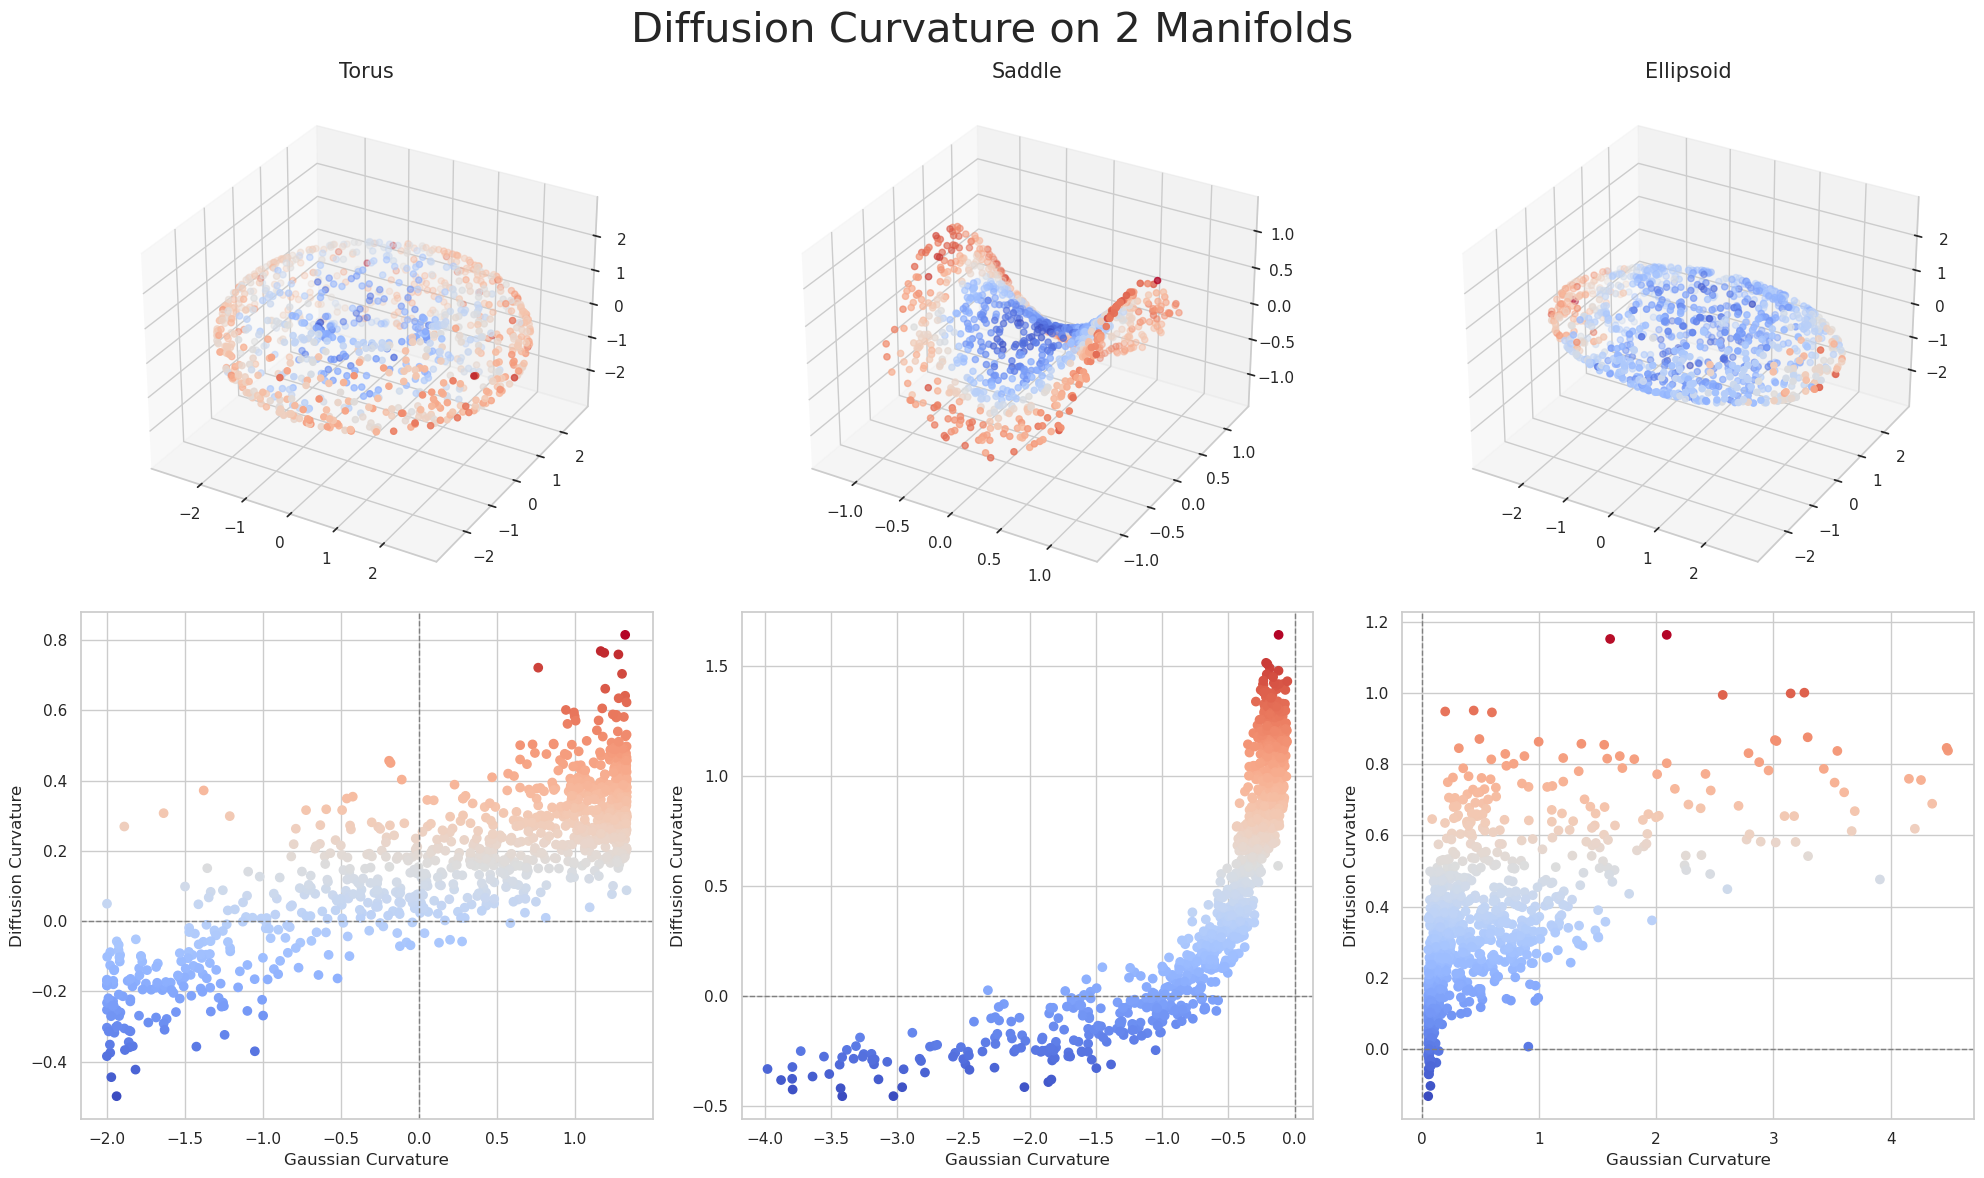
<figcaption>Figure 1: Diffusion Curvature vs Gaussian Curvature on 2-Manifolds.</figcaption>
</figure>

Though the correlation is strong – passing the ‘sniff test’ – this low-dimensional validation highlights two subtleties of our method. First, diffusion curvature, being an intrinsic, graph-based measurement, is susceptible to edge effects to a greater degree than extrinsic methods. When diffusion hits the edges of the saddle, it rebounds, creating the false appearance of positive curvature.

``` python
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import colors
import numpy as np

# Assuming Xs, labels, ground_truth_labels, and key_names are defined
# For example:
key_names = ['Torus', 'Saddle', 'Ellipsoid']
labels = curvatures
ground_truth_labels = Ks

# Set the style of seaborn
sns.set(style="whitegrid")

fig_shape = (len(curvatures.keys()) + 1, len(key_names))
method_colors = ['green', 'olive', 'navy', 'orange', 'purple']
assert len(method_colors) == len(curvatures.keys())

ordered_keys = curvatures.keys() #['Gaussian', 'Adal-PCA', 'Unsigned Diffusion Curvature', 'Hickok & Blumberg']
assert set(ordered_keys) == set(curvatures.keys())

# Create a figure and axes with 2 rows and 3 columns
fig, axs = plt.subplots(fig_shape[0], fig_shape[1], figsize=(fig_shape[0]*2, fig_shape[1]*5), subplot_kw={'projection': '3d'} if plt.matplotlib.__version__ < '3.4.0' else None)

for i, key in enumerate(key_names):
    # 3D scatter plot for the first row
    lim = np.max(np.linalg.norm(Xs[key], axis=1))
    # if plt.matplotlib.__version__ >= '3.4.0':

    # plot the curvature for each method
    for j, method_name in enumerate(ordered_keys):
        axs[j, i].remove()
        axs[j, i] = fig.add_subplot(fig_shape[0], fig_shape[1], i + j*fig_shape[1] + 1, projection='3d')
        axs[j, i].axes.set_xlim3d(left=-lim, right=lim)
        axs[j, i].axes.set_ylim3d(bottom=-lim, top=lim)
        axs[j, i].axes.set_zlim3d(bottom=-lim, top=lim)
        axs[j, i].set_xticks([])
        axs[j, i].set_yticks([])
        axs[j, i].set_zticks([])

        scaled_labels = labels[method_name][key]
        scaled_labels = scaled_labels / (max(scaled_labels) - min(scaled_labels))
        scatter3d = axs[j, i].scatter(Xs[key][:, 0], Xs[key][:, 1], Xs[key][:, 2], c=scaled_labels, cmap = 'coolwarm')
        if i == 1:
            axs[j, i].set_title(f'{method_name}',fontsize=15, c = method_colors[j])

    # Scatter plot for the second row, colored by labels
    # axs[j+1, i].remove()
    # axs[j+1, i] = fig.add_subplot(fig_shape[0], fig_shape[1], i+4)
    for k, method_name in enumerate(ordered_keys):
        # min max scaling
        scaled_labels = labels[method_name][key]
        scaled_labels = scaled_labels / (max(scaled_labels) - min(scaled_labels))
        scatter2d = axs[j+1, i].scatter(ground_truth_labels[key], scaled_labels, c = method_colors[k], s = 1)
        axs[j+1,i].set_aspect('equal')
    # axs[1, i].set_title(f'')
    axs[j+1, i].set_xlabel('Gaussian Curvature')
    axs[j+1, i].set_ylabel('Estimated Curvature')
    
    
    # Highlight the origin lines in 2D scatter plots
    axs[j+1, i].axhline(0, color='gray', linewidth=1, linestyle='--')
    axs[j+1, i].axvline(0, color='gray', linewidth=1, linestyle='--')

    # # Add colorbar for each subplot
    # fig.colorbar(scatter3d, ax=axs[0, i], fraction=0.046, pad=0.04)
    # fig.colorbar(scatter2d, ax=axs[1, i], fraction=0.046, pad=0.04)
plt.suptitle("Estimated Gaussian Curvatures of 2-Manifolds", fontsize=30)
plt.tight_layout()
plt.show()
```

<figure id="fig-2-manifolds-visual-comparison">
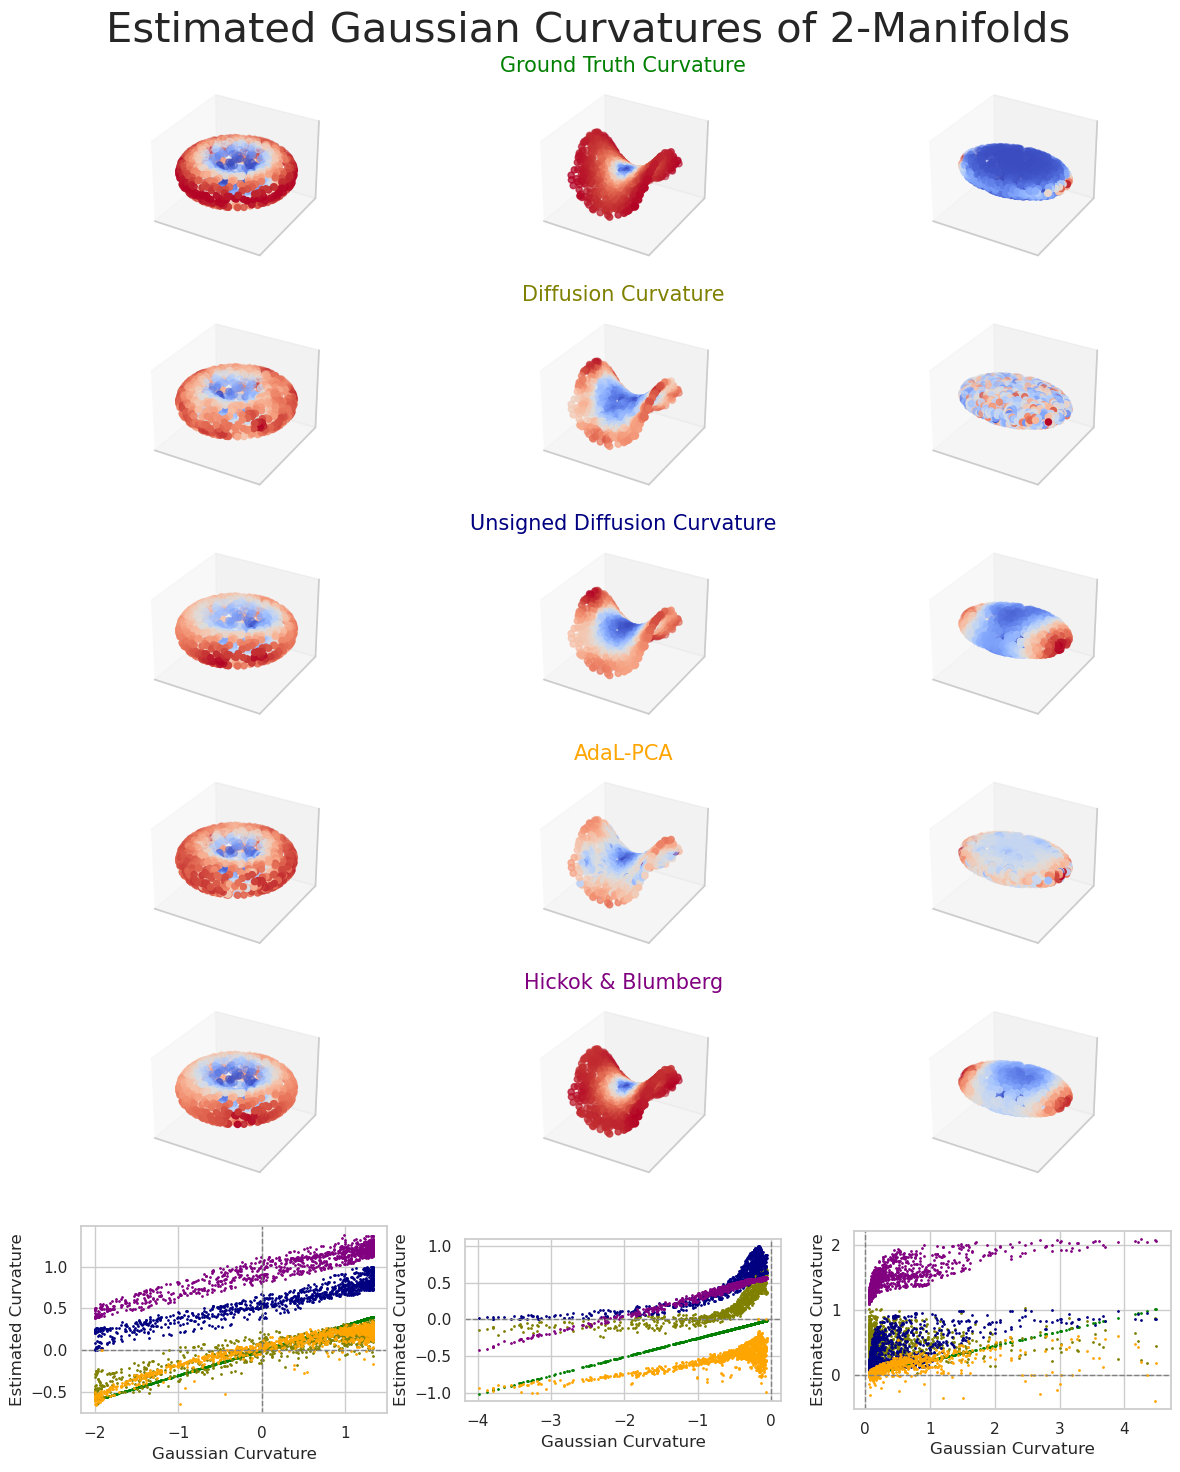
<figcaption>Figure 2: Diffusion Curvature vs Gaussian Curvature on 2-Manifolds.</figcaption>
</figure>

The second subtly emerges in the context of related methods. Everything pictured does an excellent job of coloring the toy manifolds. But looking beyond this, *what matters?* Most methods don’t care about the precise magnitude – or even exactly matching the correlations, as in the ellipsoid… %% mean vs gaussian curvature, and uniqueness of definitions%%

All of these methods in <a href="#fig-2-manifolds-visual-comparison" class="quarto-xref">Figure 2</a> perform well on well-sampled noiseless toy manifolds. In Table <a href="#fig-2-manifolds-noise-table" class="quarto-xref">Figure 3</a>, we see the results of adding Gaussian noise to each manifold.

``` python
from great_tables import GT, style, loc, exibble
from great_tables.data import sp500
import pandas as pd

df = metric_df

# Group the data by metric for proper sorting and display
df = df.sort_values(by=['Metric', 'Model']).reset_index(drop=True)

# Create the table with row groups
table = (
    GT(df, rowname_col="Model", groupname_col="Metric")
    .tab_header(title="Curvature under Noise", subtitle="2-Manifolds with Noise")
    .tab_stubhead(label="Model & Metric")
    .cols_label(
        Model="Model",
        Metric="Metric",
        **{col: col for col in df.columns if col not in ["Model", "Metric"]}
    )
    .tab_spanner(label="Torus", columns=[col for col in df.columns if "Torus" in col])
    .tab_spanner(label="Ellipsoid", columns=[col for col in df.columns if "Ellipsoid" in col])
    .tab_spanner(label="Saddle", columns=[col for col in df.columns if "Saddle" in col])
    .fmt_number(columns=[col for col in df.columns if col not in ["Model", "Metric"]], decimals=3)
)

# Function to apply styles to the best values
def apply_best_value_styles(df, table):
    for metric in df['Metric'].unique():
        metric_df = df[df['Metric'] == metric]
        for col in df.columns[2:]:
            if metric == 'PCC':
                best_value = metric_df[col].max()
            else:  # For RMSE and other metrics where lower is better
                best_value = metric_df[col].min()
                
            best_indices = metric_df[metric_df[col] == best_value].index.tolist()
            for index in best_indices:
                table = table.tab_style(
                    style=style.text(weight="bold"),
                    locations=loc.body(columns=[col], rows=[index])
                )
    return table

# Apply the styles
table = apply_best_value_styles(df, table)

# Display the table (assuming in Jupyter Notebook)
display(table)
```

<div id="cnramwscbt" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>
#cnramwscbt table {
          font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen, Ubuntu, Cantarell, 'Helvetica Neue', 'Fira Sans', 'Droid Sans', Arial, sans-serif;
          -webkit-font-smoothing: antialiased;
          -moz-osx-font-smoothing: grayscale;
        }

#cnramwscbt thead, tbody, tfoot, tr, td, th { border-style: none; }
 tr { background-color: transparent; }
#cnramwscbt p { margin: 0; padding: 0; }
 #cnramwscbt .gt_table { display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3; }
 #cnramwscbt .gt_caption { padding-top: 4px; padding-bottom: 4px; }
 #cnramwscbt .gt_title { color: #333333; font-size: 125%; font-weight: initial; padding-top: 4px; padding-bottom: 4px; padding-left: 5px; padding-right: 5px; border-bottom-color: #FFFFFF; border-bottom-width: 0; }
 #cnramwscbt .gt_subtitle { color: #333333; font-size: 85%; font-weight: initial; padding-top: 3px; padding-bottom: 5px; padding-left: 5px; padding-right: 5px; border-top-color: #FFFFFF; border-top-width: 0; }
 #cnramwscbt .gt_heading { background-color: #FFFFFF; text-align: center; border-bottom-color: #FFFFFF; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; }
 #cnramwscbt .gt_bottom_border { border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; }
 #cnramwscbt .gt_col_headings { border-top-style: solid; border-top-width: 2px; border-top-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; }
 #cnramwscbt .gt_col_heading { color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 5px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; }
 #cnramwscbt .gt_column_spanner_outer { color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; padding-top: 0; padding-bottom: 0; padding-left: 4px; padding-right: 4px; }
 #cnramwscbt .gt_column_spanner_outer:first-child { padding-left: 0; }
 #cnramwscbt .gt_column_spanner_outer:last-child { padding-right: 0; }
 #cnramwscbt .gt_column_spanner { border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 5px; overflow-x: hidden; display: inline-block; width: 100%; }
 #cnramwscbt .gt_spanner_row { border-bottom-style: hidden; }
 #cnramwscbt .gt_group_heading { padding-top: 8px; padding-bottom: 8px; padding-left: 5px; padding-right: 5px; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: initial; text-transform: inherit; border-top-style: solid; border-top-width: 2px; border-top-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: middle; text-align: left; }
 #cnramwscbt .gt_empty_group_heading { padding: 0.5px; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: initial; border-top-style: solid; border-top-width: 2px; border-top-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; vertical-align: middle; }
 #cnramwscbt .gt_from_md> :first-child { margin-top: 0; }
 #cnramwscbt .gt_from_md> :last-child { margin-bottom: 0; }
 #cnramwscbt .gt_row { padding-top: 8px; padding-bottom: 8px; padding-left: 5px; padding-right: 5px; margin: 10px; border-top-style: solid; border-top-width: 1px; border-top-color: #D3D3D3; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: middle; overflow-x: hidden; }
 #cnramwscbt .gt_stub { color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: initial; text-transform: inherit; border-right-style: solid; border-right-width: 2px; border-right-color: #D3D3D3; padding-left: 5px; padding-right: 5px; }
 #cnramwscbt .gt_stub_row_group { color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: initial; text-transform: inherit; border-right-style: solid; border-right-width: 2px; border-right-color: #D3D3D3; padding-left: 5px; padding-right: 5px; vertical-align: top; }
 #cnramwscbt .gt_row_group_first td { border-top-width: 2px; }
 #cnramwscbt .gt_row_group_first th { border-top-width: 2px; }
 #cnramwscbt .gt_table_body { border-top-style: solid; border-top-width: 2px; border-top-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #D3D3D3; }
 #cnramwscbt .gt_sourcenotes { color: #333333; background-color: #FFFFFF; border-bottom-style: none; border-bottom-width: 2px; border-bottom-color: #D3D3D3; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; }
 #cnramwscbt .gt_sourcenote { font-size: 90%; padding-top: 4px; padding-bottom: 4px; padding-left: 5px; padding-right: 5px; text-align: left; }
 #cnramwscbt .gt_left { text-align: left; }
 #cnramwscbt .gt_center { text-align: center; }
 #cnramwscbt .gt_right { text-align: right; font-variant-numeric: tabular-nums; }
 #cnramwscbt .gt_font_normal { font-weight: normal; }
 #cnramwscbt .gt_font_bold { font-weight: bold; }
 #cnramwscbt .gt_font_italic { font-style: italic; }
 #cnramwscbt .gt_super { font-size: 65%; }
 #cnramwscbt .gt_footnote_marks { font-size: 75%; vertical-align: 0.4em; position: initial; }
 #cnramwscbt .gt_asterisk { font-size: 100%; vertical-align: 0; }
 
</style>

| Curvature under Noise        |                                              |                    |                   |                    |                   |                    |                                               |                     |                    |                     |                    |                     |                                                  |                        |                       |                        |                       |                        |
|------------------------------|----------------------------------------------|--------------------|-------------------|--------------------|-------------------|--------------------|-----------------------------------------------|---------------------|--------------------|---------------------|--------------------|---------------------|--------------------------------------------------|------------------------|-----------------------|------------------------|-----------------------|------------------------|
| 2-Manifolds with Noise       |                                              |                    |                   |                    |                   |                    |                                               |                     |                    |                     |                    |                     |                                                  |                        |                       |                        |                       |                        |
| Model & Metric               | <span class="gt_column_spanner">Torus</span> |                    |                   |                    |                   |                    | <span class="gt_column_spanner">Saddle</span> |                     |                    |                     |                    |                     | <span class="gt_column_spanner">Ellipsoid</span> |                        |                       |                        |                       |                        |
|                              | Torus                                        | Torus noise = 0.05 | Torus noise = 0.1 | Torus noise = 0.15 | Torus noise = 0.2 | Torus noise = 0.25 | Saddle                                        | Saddle noise = 0.05 | Saddle noise = 0.1 | Saddle noise = 0.15 | Saddle noise = 0.2 | Saddle noise = 0.25 | Ellipsoid                                        | Ellipsoid noise = 0.05 | Ellipsoid noise = 0.1 | Ellipsoid noise = 0.15 | Ellipsoid noise = 0.2 | Ellipsoid noise = 0.25 |
| ED                           |                                              |                    |                   |                    |                   |                    |                                               |                     |                    |                     |                    |                     |                                                  |                        |                       |                        |                       |                        |
| AdaL-PCA                     | 0.671                                        | 0.695              | 0.862             | 1.053              | 1.258             | 1.346              | 0.546                                         | 5.179               | 6.903              | 5.927               | 5.019              | 4.513               | 0.297                                            | 0.596                  | 1.036                 | 1.610                  | 1.944                 | 2.087                  |
| Diffusion Curvature          | 0.757                                        | 0.813              | 0.854             | 0.889              | 0.963             | 0.976              | 0.952                                         | 0.722               | 0.363              | 0.327               | 0.383              | 0.513               | 0.349                                            | 0.620                  | 0.683                 | 0.933                  | 1.070                 | 1.102                  |
| Hickok & Blumberg            | 0.961                                        | 0.865              | 0.556             | 0.365              | 0.353             | 0.409              | 2.138                                         | 1.741               | 0.953              | 1.072               | 1.455              | 1.726               | 1.070                                            | 0.875                  | 0.319                 | 0.593                  | 1.055                 | 1.305                  |
| Unsigned Diffusion Curvature | 0.573                                        | 0.572              | 0.569             | 0.567              | 0.566             | 0.566              | 1.180                                         | 1.180               | 1.190              | 1.199               | 1.202              | 1.190               | 0.181                                            | 0.187                  | 0.194                 | 0.199                  | 0.188                 | 0.191                  |
| PCC                          |                                              |                    |                   |                    |                   |                    |                                               |                     |                    |                     |                    |                     |                                                  |                        |                       |                        |                       |                        |
| AdaL-PCA                     | 0.942                                        | 0.562              | 0.153             | 0.069              | 0.078             | 0.033              | 0.740                                         | 0.035               | 0.007              | 0.047               | 0.096              | 0.179               | 0.561                                            | −0.102                 | −0.028                | 0.040                  | 0.085                 | 0.091                  |
| Diffusion Curvature          | 0.918                                        | 0.935              | 0.954             | 0.957              | 0.948             | 0.931              | 0.739                                         | 0.800               | 0.801              | 0.764               | 0.707              | 0.636               | 0.004                                            | −0.003                 | 0.002                 | −0.002                 | 0.009                 | 0.011                  |
| Hickok & Blumberg            | 0.954                                        | 0.955              | 0.945             | 0.903              | 0.856             | 0.791              | 0.992                                         | 0.966               | 0.904              | 0.828               | 0.749              | 0.664               | 0.727                                            | 0.734                  | 0.706                 | 0.640                  | 0.575                 | 0.521                  |
| Unsigned Diffusion Curvature | 0.948                                        | 0.942              | 0.931             | 0.909              | 0.873             | 0.838              | 0.838                                         | 0.834               | 0.809              | 0.765               | 0.703              | 0.629               | 0.595                                            | 0.583                  | 0.558                 | 0.548                  | 0.551                 | 0.537                  |
| RMSE                         |                                              |                    |                   |                    |                   |                    |                                               |                     |                    |                     |                    |                     |                                                  |                        |                       |                        |                       |                        |
| AdaL-PCA                     | 0.791                                        | 0.981              | 1.702             | 2.041              | 2.676             | 2.652              | 0.597                                         | 157.151             | 83.544             | 48.499              | 29.631             | 21.951              | 0.681                                            | 3.707                  | 6.694                 | 7.433                  | 6.795                 | 6.402                  |
| Diffusion Curvature          | 0.916                                        | 0.954              | 0.988             | 1.024              | 1.110             | 1.130              | 1.102                                         | 0.900               | 0.632              | 0.642               | 0.574              | 0.628               | 0.760                                            | 0.888                  | 0.921                 | 1.074                  | 1.186                 | 1.218                  |
| Hickok & Blumberg            | 1.359                                        | 1.256              | 0.928             | 0.670              | 0.601             | 0.676              | 3.108                                         | 2.420               | 1.912              | 3.334               | 4.246              | 4.745               | 0.983                                            | 0.794                  | 0.547                 | 0.791                  | 1.222                 | 1.661                  |
| Unsigned Diffusion Curvature | 0.894                                        | 0.892              | 0.900             | 0.903              | 0.904             | 0.907              | 1.295                                         | 1.295               | 1.309              | 1.323               | 1.332              | 1.323               | 0.598                                            | 0.605                  | 0.616                 | 0.618                  | 0.617                 | 0.624                  |

</div>
        

Figure 3: Performance of methods under noise on 2-Manifolds with Noise.

### 4.0.1 Differentiating Sign in High Dimensions

Most existing methods only quantify their performance in high dimensions on one or two test cases.

``` python
SS1._aggregate_labels()
SS1.plot_by_dimension()
```

<figure id="fig-sadspheres">
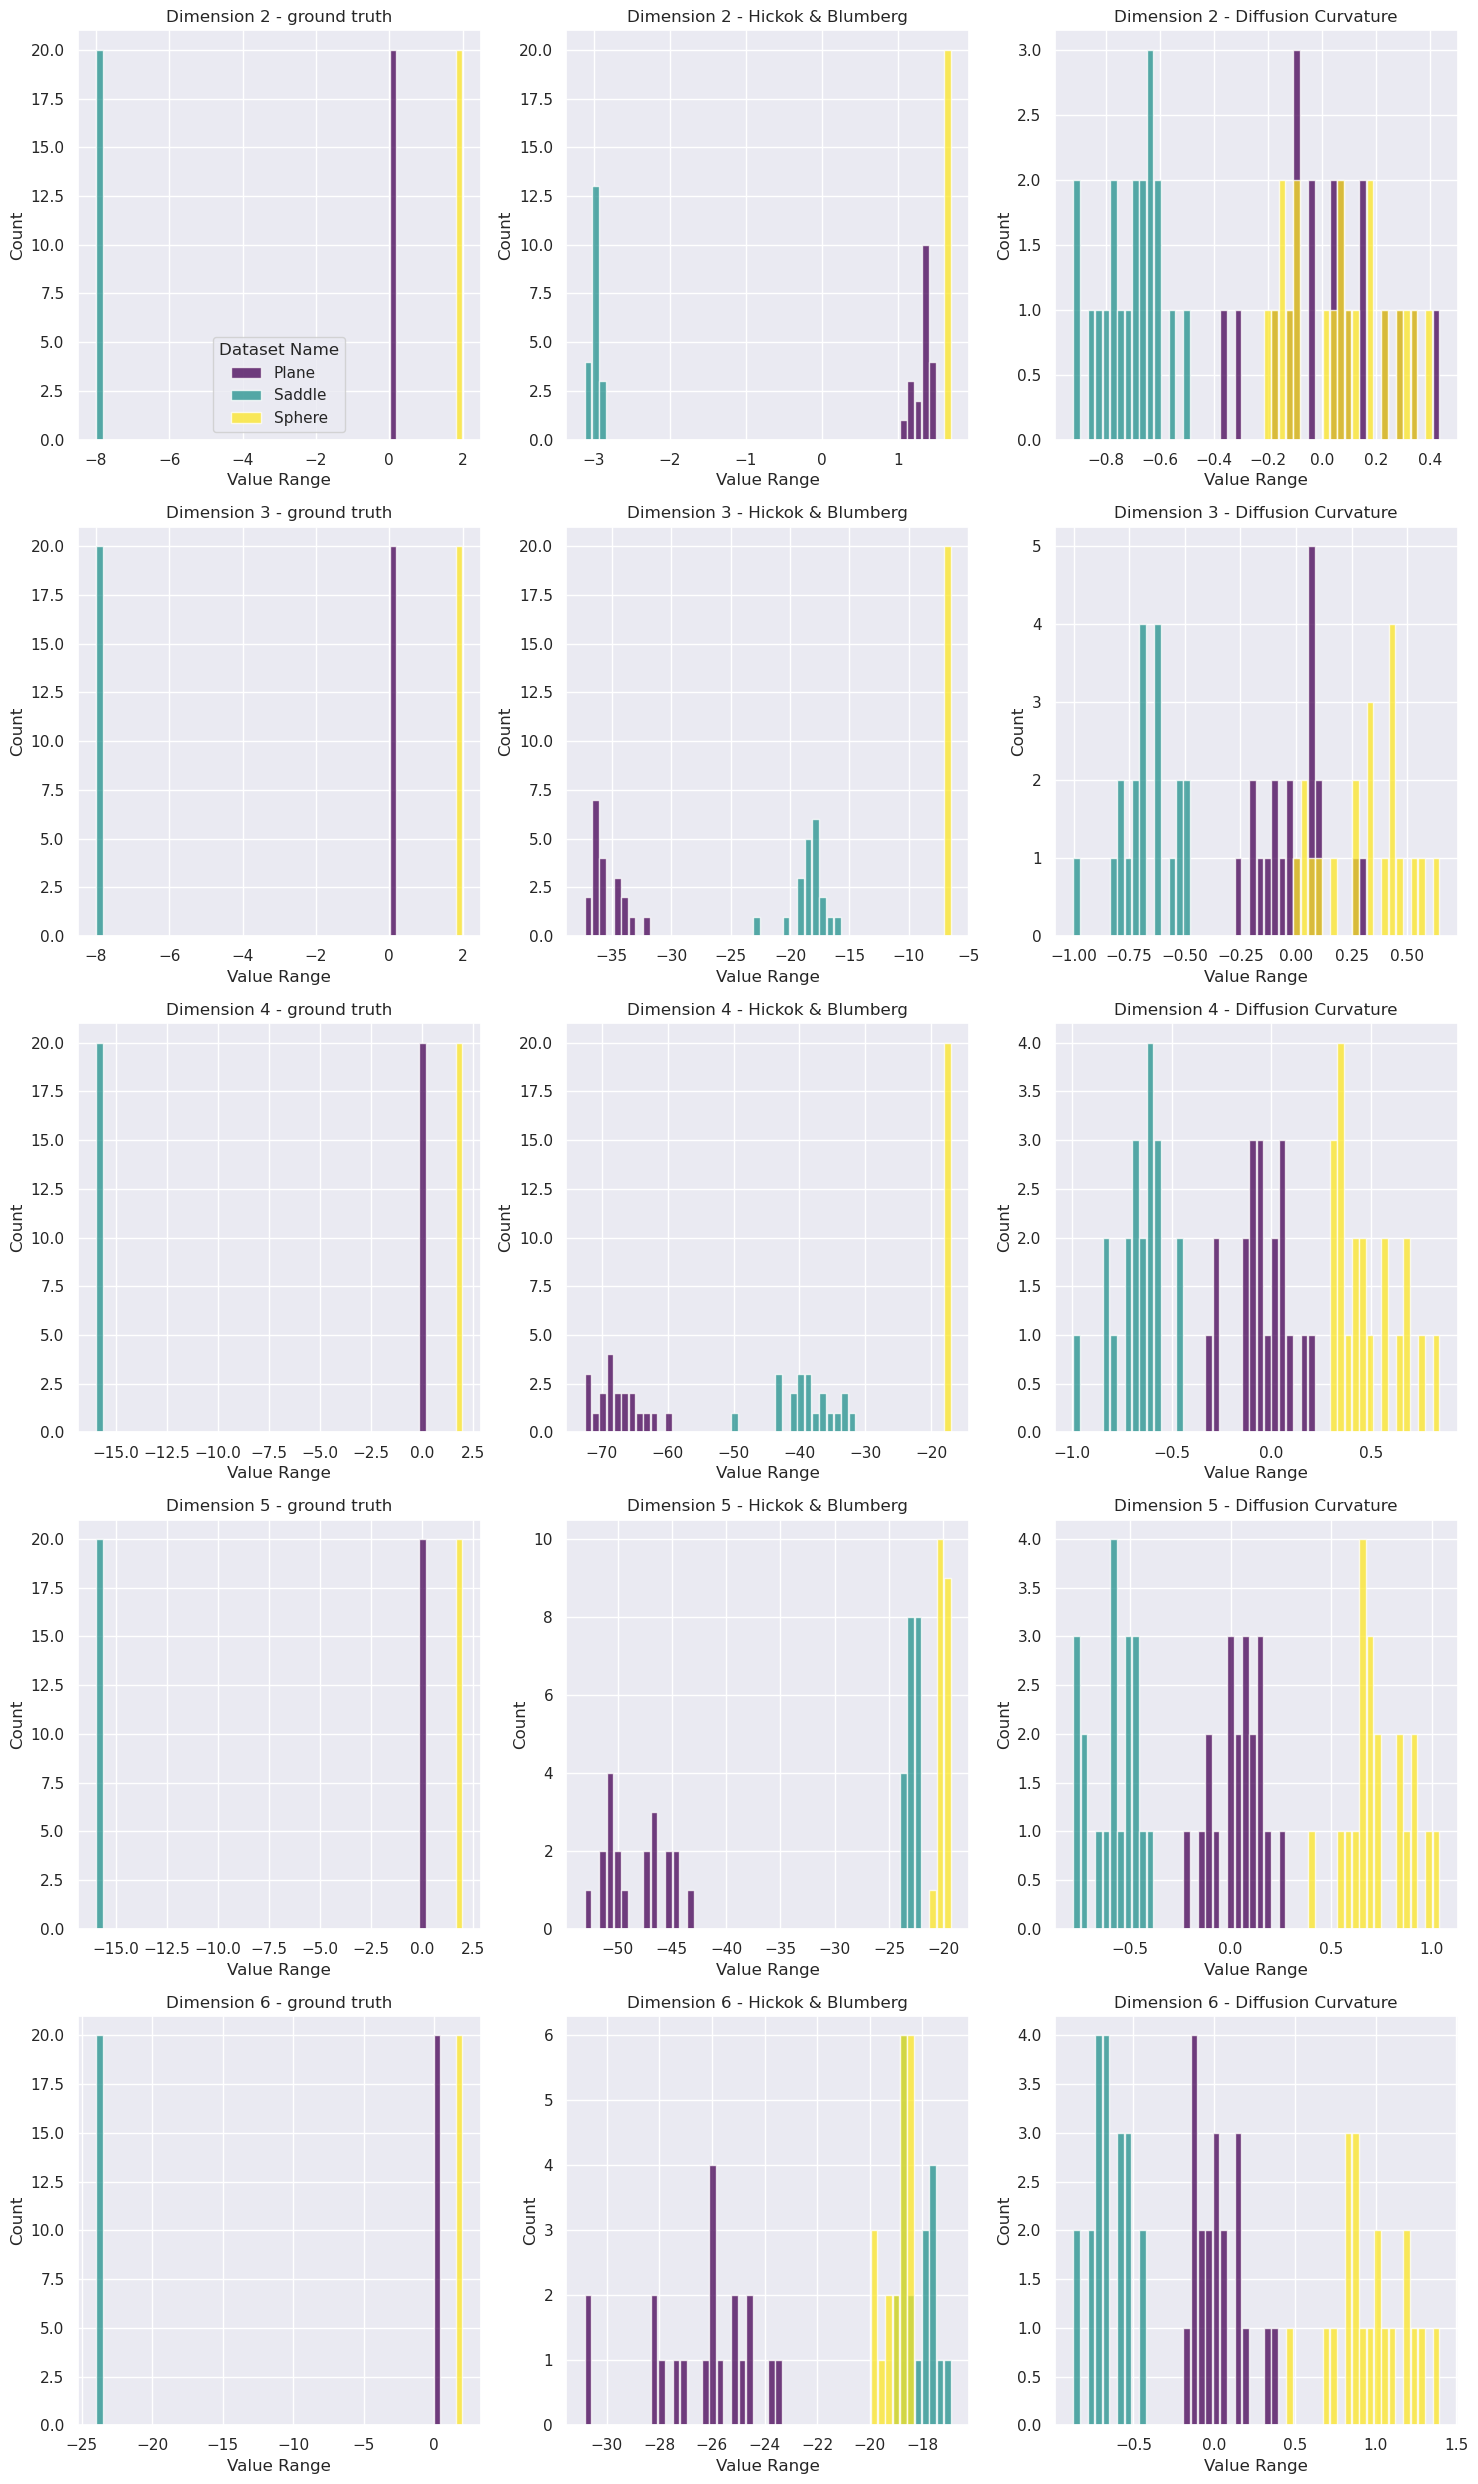
<figcaption>Figure 4: Predicted curvatures of Saddles and Spheres in dimensions 2-6. Diffusion Curvature robustly distinguishes between the signs of the data, even in high dimensions, and with relative sparsity.</figcaption>
</figure>

## 4.1 Loss Landscapes

## 4.2 Curvature as a TDA Filtration

# 5. Related Work

## 5.1 Foreman Ricci Curvature

## 5.2 Hickock & Blumberg’s Volume Comparison Curvature

## 5.3 Sritharan

# 6. Conclusion

# References

Bhaskar, Dhananjay, Kincaid MacDonald, Oluwadamilola Fasina, Dawson Thomas, Bastian Rieck, Ian Adelstein, and Smita Krishnaswamy. 2022. “Diffusion Curvature for Estimating Local Curvature in High Dimensional Data.” *Advances in Neural Information Processing Systems* 35: 21738–49. <https://proceedings.neurips.cc/paper_files/paper/2022/hash/88438dc62fc5c8777e2b5f1b4f6d37a2-Abstract-Conference.html>.

“Bishop–Gromov Inequality.” 2021. In *Wikipedia*. <https://en.wikipedia.org/w/index.php?title=Bishop%E2%80%93Gromov_inequality&oldid=1059331416>.

Coifman, Ronald R., and Stéphane Lafon. 2006. “Diffusion Maps.” *Applied and Computational Harmonic Analysis*, Special Issue: Diffusion Maps and Wavelets, 21 (1): 5–30. <https://doi.org/10.1016/j.acha.2006.04.006>.

Hickok, Abigail, and Andrew J. Blumberg. 2023. “An Intrinsic Approach to Scalar-Curvature Estimation for Point Clouds.” arXiv. <https://doi.org/10.48550/arXiv.2308.02615>.

Huguet, Guillaume, Alexander Tong, Edward De Brouwer, Yanlei Zhang, Guy Wolf, Ian Adelstein, and Smita Krishnaswamy. 2023. “A Heat Diffusion Perspective on Geodesic Preserving Dimensionality Reduction.” May 30, 2023. <https://doi.org/10.48550/arXiv.2305.19043>.

Moon, Kevin R., David van Dijk, Zheng Wang, Scott Gigante, Daniel B. Burkhardt, William S. Chen, Kristina Yim, et al. 2019. “Visualizing Structure and Transitions in High-Dimensional Biological Data.” *Nature Biotechnology* 37 (12, 12): 1482–92. <https://doi.org/10.1038/s41587-019-0336-3>.

Ollivier, Yann. 2009. “Ricci Curvature of Markov Chains on Metric Spaces.” *Journal of Functional Analysis* 256 (3): 810–64. <https://doi.org/10.1016/j.jfa.2008.11.001>.

Saloff-Coste, Laurent. 2010. “The Heat Kernel and Its Estimates.” In *Advanced Studies in Pure Mathematics*, 405–36. Kyoto University, Japan. <https://doi.org/10.2969/aspm/05710405>.

Steinerberger, Stefan. 2022. “Curvature on Graphs via Equilibrium Measures.” September 5, 2022. <https://doi.org/10.48550/arXiv.2202.01658>.

Tong, Alexander Y., Guillaume Huguet, Amine Natik, Kincaid Macdonald, Manik Kuchroo, Ronald Coifman, Guy Wolf, and Smita Krishnaswamy. 2021. “Diffusion Earth Mover’s Distance and Distribution Embeddings.” In *Proceedings of the 38th International Conference on Machine Learning*, 10336–46. PMLR. <https://proceedings.mlr.press/v139/tong21a.html>.

Tong, Alexander, Frederick Wenkel, Kincaid Macdonald, Smita Krishnaswamy, and Guy Wolf. 2021. “Data-Driven Learning of Geometric Scattering Modules for Gnns.” In *2021 IEEE 31st International Workshop on Machine Learning for Signal Processing (MLSP)*, 1–6. IEEE. <https://ieeexplore.ieee.org/abstract/document/9596169/>.

[1] Consider kernel density estimation, where one places gaussians on each data point and sums up the probability assigned to each area. The higher the curvature, the higher the reported density, since at the end of an ellipsoid the gaussians have greater overlap with each other than in its center – even though the intrinsic density of the surface is uniform.

[2] This simplex corresponds to the ‘diffusion coordinates’ used by Coifman, as well as the setting of Fasina’s diffusion-based Fisher Information metric (CITE).